## Tomado de este [artículo](https://www.kaggle.com/residentmario/plotting-with-seaborn)

In [1]:
import pandas as pd
import seaborn as sns
reviews = pd.read_csv('C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\winemag-data_first150k.csv', index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


### Countplot
The pandas bar chart becomes a seaborn countplot.

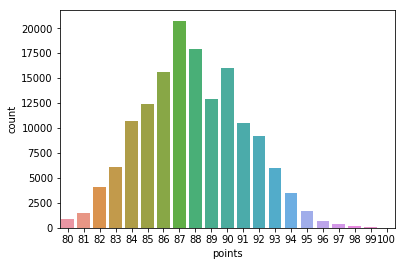

In [2]:
sns.countplot(reviews['points'])

### Distplot
The seaborn equivalent to a pandas histogram is the distplot. Here's an example:

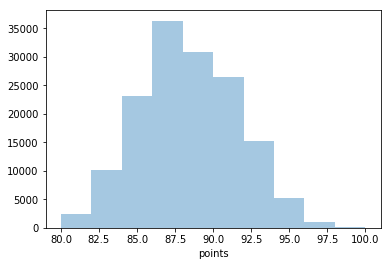

In [3]:
sns.distplot(reviews['points'], bins=10, kde=False)

### Scatterplot and hexplot
To plot two variables against one another in seaborn, we use jointplot.

C:\Users\ivonnics\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


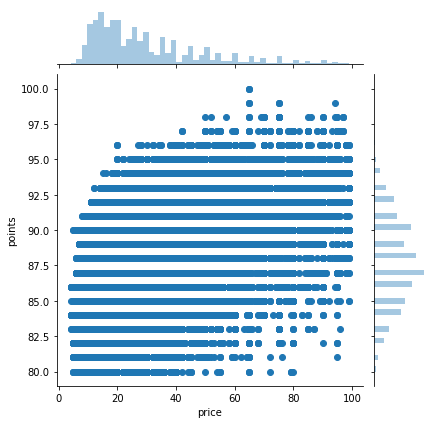

In [4]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

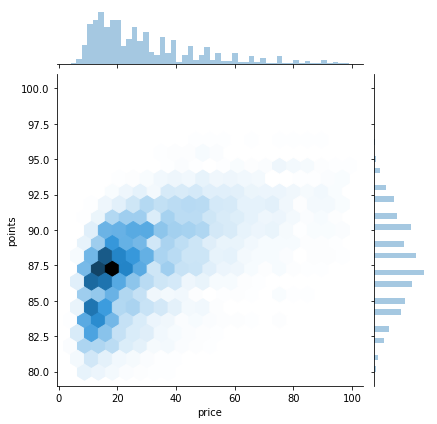

In [5]:
#As in pandas, we can use a hex plot (by simply passing kind='hex') to deal with overplotting:

sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

### Boxplot and violin plot
seaborn provides a boxplot function. It creates a statistically useful plot that looks like this:

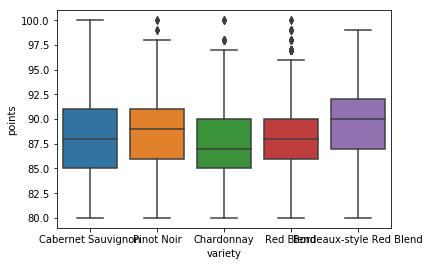

In [6]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df)

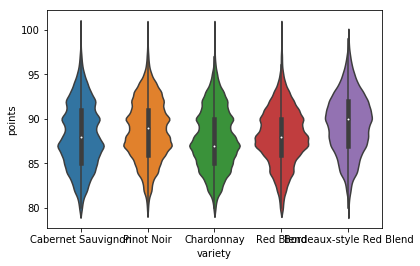

In [7]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])

C:\Users\ivonnics\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ivonnics\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


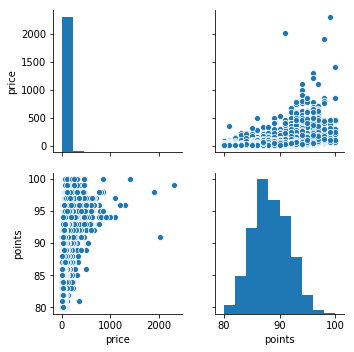

In [8]:
#de https://www.kaggle.com/residentmario/faceting-with-seaborn/
sns.pairplot(reviews[['price', 'points']])

## Multivariate plotting
### [Multivariate Scatter Plot](https://www.kaggle.com/residentmario/multivariate-plotting)


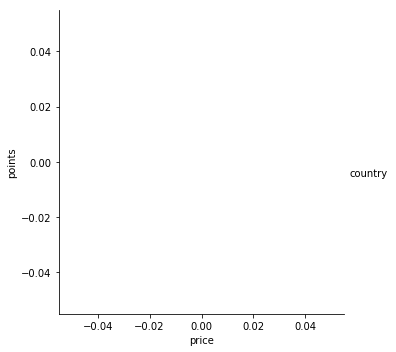

In [12]:
sns.lmplot(x='price', y='points', hue='country', 
           data=reviews.loc[reviews['points'].isin(['ST', 'RW', 'LW'])], 
           fit_reg=False)

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

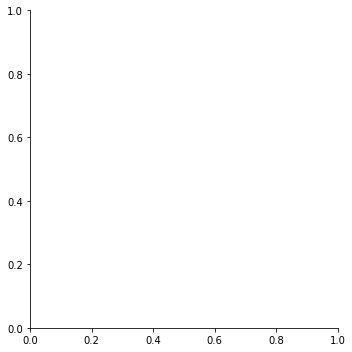

In [14]:
sns.lmplot(x='price', y='points', markers=['o', 'x', '*'], hue='country',
           data=reviews.loc[reviews['points'].isin(['ST', 'RW', 'LW'])],
           fit_reg=False)

In [18]:
#Grouped box plot
f = (reviews
         .loc[reviews['price'].isin(['ST', 'GK'])]
         .loc[:, ['price', 'points']]
    )
f = f[f["points"] >= 80]
f = f[f["points"] < 85]
#f['Aggression'] = f['Aggression'].astype(float)

sns.boxplot(x='price', y='points', hue='price', data=f)

ValueError: min() arg is an empty sequence

# Curso ScatterPlot con Seaborn:
### tomado de [aquí](https://towardsdatascience.com/everything-you-need-to-know-about-scatter-plots-for-data-visualisation-924144c0bc5)
## Regression plotting:

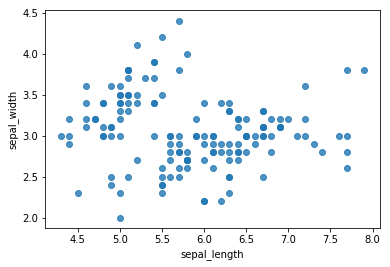

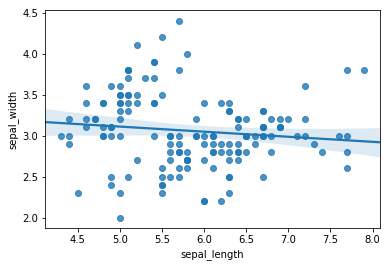

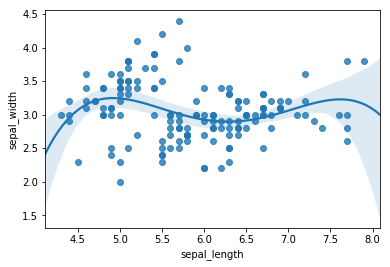

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
 
# A regular scatter plot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False)
plt.show()
 
# A scatter plot with a linear regression fit:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=True)
plt.show()

# A scatter plot with a polynomial regression fit:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=True, order=4)
plt.show()

## Color and Shape:

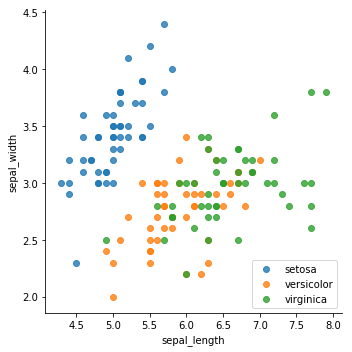

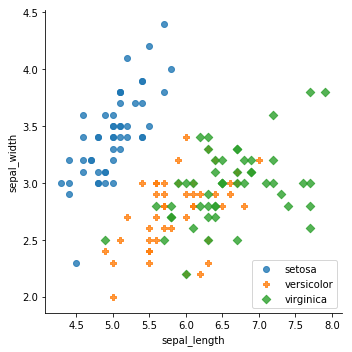

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right')
plt.show()

sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False, markers=["o", "P", "D"])
plt.legend(loc='lower right')
plt.show()

## Marginal Histogram
Scatter plots with marginal histograms are those which have plotted histograms on the top and side, representing the distribution of the points for the features along the x- and y- axes. It’s a small addition but great for seeing the exact distribution of our points and more accurately identify our outliers.

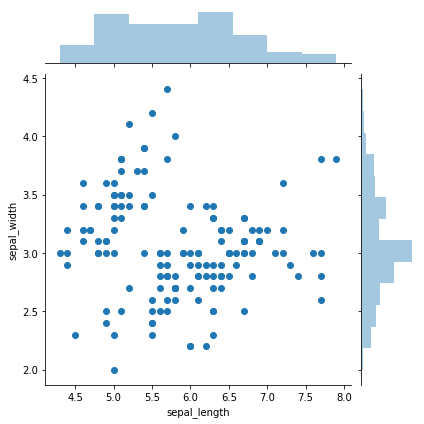

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('iris')
 
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')

plt.show()

## Bubble Plots
With bubble plots we are able to use several variables to encode information. The new one we will add here is size. In the figure below we are plotting the number of french fries eaten by each person vs their height and weight. Notice that a scatter plot is only a 2D visualisation tool, but that using different attributes we can represent 3-dimensional information.

Here we are using color, position, and size. The position determines the person’s height and weight, the color determines the gender, and the size determines the number of french fries eaten! The bubble plot lets us conveniently combine all of the attributes into one plot so that we can see the high-dimensional information in a simple 2D view; nothing crazy complicated.

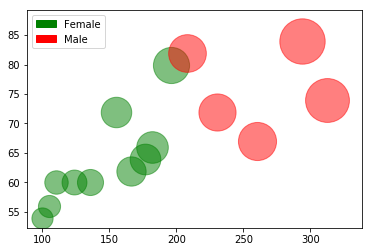

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x = np.array([100, 105, 110, 124, 136, 155, 166, 177, 182, 196, 208, 230, 260, 294, 312])
y = np.array([54, 56, 60, 60, 60, 72, 62, 64, 66, 80, 82, 72, 67, 84, 74])
z = (x*y) / 60

for index, val in enumerate(z):
    if index < 10:
        color = 'g'
    else:
        color = 'r'
    plt.scatter(x[index], y[index], s=z[index]*5, alpha=0.5, c=color)

red_patch = mpatches.Patch(color='red', label='Male')
green_patch = mpatches.Patch(color='green', label='Female')
plt.legend(handles=[green_patch, red_patch])

Text(0.0, 1.0, 'A bubble plot')

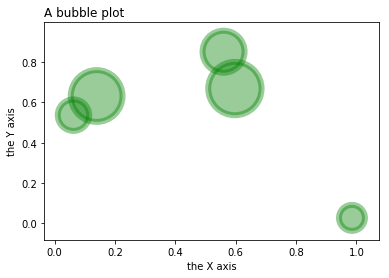

In [2]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = np.random.rand(5)
y = np.random.rand(5)
z = np.random.rand(5)
 
# pimp your plot with the seaborn style
import seaborn as sns
plt.scatter(x, y, s=z*4000, c="green", alpha=0.4, linewidth=6)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A bubble plot", loc="left")


### Map a color to bubble plot

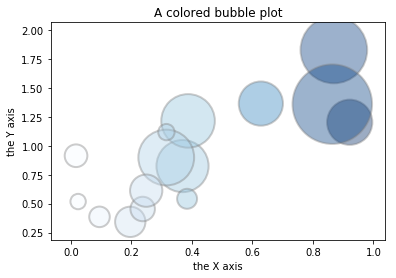

In [3]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
 
# create data
x = np.random.rand(15)
y = x+np.random.rand(15)
z = x+np.random.rand(15)
z=z*z
 
# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*2000, c=x, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.title("A colored bubble plot")
 
plt.show()
